In [62]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import sklearn as sk
from sklearn.metrics import r2_score

In [63]:
df_bicicletas = pd.read_csv("databici.csv")
df_bicicletas.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [64]:
#1. ¿Qué rango de hora es la de mayor demanda?
df_demandaxhr=df_bicicletas[["hr","cnt"]]
barras_horas=df_demandaxhr.groupby(by="hr",dropna=False).sum()
barras_horas=barras_horas.reset_index()

barras_horas

,hr,cnt
0,0,39130
1,1,24164
2,2,16352
3,3,8174
4,4,4428
5,5,14261
6,6,55132
7,7,154171
8,8,261001
9,9,159438


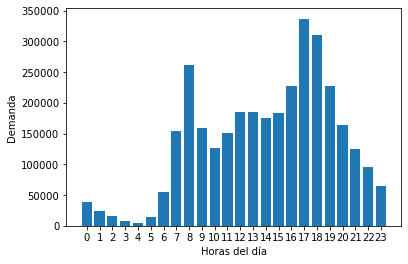

In [65]:
plt.bar(barras_horas.hr,barras_horas.cnt)
plt.ylabel("Demanda")
plt.xlabel("Horas del día")
plt.xticks(range(0,24))
plt.show()

#La mayor demanda se da por la mañana a las 8:00 horas y en la tarde entre 17:00 y 19:00 horas.

In [66]:
#2. ¿Qué temporada es la mas alta?
df_demandaxtemporada=df_bicicletas[["season","cnt"]]
barras_temporada=df_demandaxtemporada.groupby(by="season",dropna=False).sum()
barras_temporada=barras_temporada.reset_index()
barras_temporada

,season,cnt
0,1,471348
1,2,918589
2,3,1061129
3,4,841613


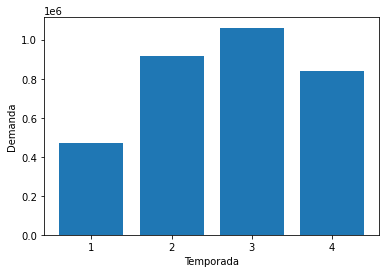

In [67]:
plt.bar(barras_temporada.season,barras_temporada.cnt)
plt.ylabel("Demanda")
plt.xlabel("Temporada")
plt.xticks(range(1,5))
plt.show()
#La mayor demanda es en la temporada 3

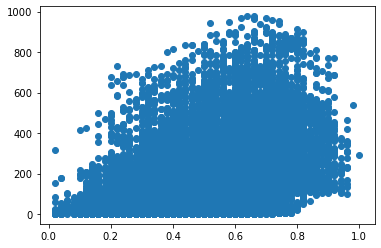

In [68]:
plt.scatter(df_bicicletas.temp,df_bicicletas.cnt)
plt.show()

In [69]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

In [70]:
len(df_bicicletas)

17379

In [71]:
msk = np.random.rand(len(df_bicicletas)) < 0.8
train = df_bicicletas[msk]
test = df_bicicletas[~msk]

In [72]:
len(test)

3474

In [75]:
train_x = np.asanyarray(train[["hum","temp"]])
train_y = np.asanyarray(train[["cnt"]])

regr.fit(train_x,train_y)
print("Coeficientes:",regr.coef_)
print("Intercepto:",regr.intercept_)



Coeficientes: [[-275.70994609  357.28067487]]
Intercepto: [184.10473019]


In [77]:
test_x = np.asanyarray(test[["hum","temp"]])
test_y = np.asanyarray(test[["cnt"]])

estimacion_y=regr.predict(test_x)
print("R2: %.2f"%r2_score(estimacion_y,test_y))

R2: -2.05


In [ ]:
#La humedad y la temperatura sí son relevantes para el modelo

In [ ]:
#Las condiciones ideales para la demanda